In [ ]:
#default_exp basic_operations_01

In [ ]:
#export
import fastai
from pathlib import Path
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt

#the only torch import we will have in the project
from torch import tensor
import random
import pdb

_all_ = ["Path", "set_trace", "datasets", "pickle", "gzip", "math", "torch", "tensor", "random", "pdb"]

MNIST_URL='http://deeplearning.net/data/mnist/mnist.pkl'

# Data and Visualization

In [ ]:
#export
def is_equal(a,b):
    assert(a==b)

In [ ]:
path = datasets.download_data(MNIST_URL, ext='.gz'); path

PosixPath('/Users/bradleybrown/.fastai/data/mnist.pkl.gz')

In [ ]:
with gzip.open(path, 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [ ]:
x_train, y_train, x_valid, y_valid = map(tensor, (x_train, y_train, x_valid, y_valid))

In [ ]:
#export
mpl.rcParams['image.cmap'] = 'gray'
def show_im(image, size=28):
    im_size = image.flatten().shape[0]
    if im_size > size**2:
        image = image[random.randint(0,math.floor((im_size-1)/size**2))]
    plt.imshow(image.view(size,size))

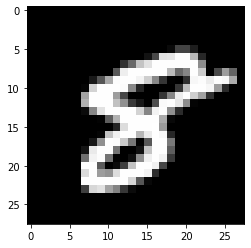

In [ ]:
show_im(x_train)

In [ ]:
#export
def near(a,b): return torch.allclose(a, b, rtol=1e-3, atol=1e-5)
def test_near(a,b): 
    if near(a,b) == True:
        print("good")
    else:
        print("not near")

# Matmul

In [ ]:
test_weight = torch.randn(784, 10)
ims = x_train[:5]
ground_truth = ims @ test_weight

In [ ]:
def matmul(a, b):
    ar, ac = a.shape
    br, bc = b.shape
    assert (ac == br)
    c = torch.zeros(ar,bc)
    for bc_in in range(bc):
        for ar_in in range(ar):
            for ac_in in range(ac):
                c[ar_in][bc_in] += a[ar_in][ac_in]*b[ac_in][bc_in]
    
    return c

In [ ]:
%time c = matmul(ims,test_weight)

CPU times: user 664 ms, sys: 1.73 ms, total: 666 ms
Wall time: 666 ms


In [ ]:
test_near(c,ground_truth)

good


In [ ]:
def matmul2(a, b):
    ar, ac = a.shape
    br, bc = b.shape
    assert (ac == br)
    c = torch.zeros(ar,bc)
    for bc_in in range(bc):
        for ar_in in range(ar):
                c[ar_in][bc_in] += (a[ar_in,:]*b[:,bc_in]).sum()
    
    return c

In [ ]:
%time c2 = matmul2(ims,test_weight)

CPU times: user 3.58 ms, sys: 1.7 ms, total: 5.28 ms
Wall time: 3.57 ms


In [ ]:
test_near(c2,ground_truth)

good


In [ ]:
def matmul3(a, b):
    ar, ac = a.shape
    br, bc = b.shape
    assert (ac == br)
    c = torch.zeros(ar,bc)
    for ar_in in range(ar):
        c[ar_in] += (a[ar_in].unsqueeze(-1) * b).sum(dim=0)
    
    return c

In [ ]:
%time c3 = matmul3(ims,test_weight)

CPU times: user 768 µs, sys: 625 µs, total: 1.39 ms
Wall time: 729 µs


In [ ]:
 test_near(c3,ground_truth)

good


In [ ]:
#export
def matmul4(a,b): return a @ b

In [ ]:
%time c4 = matmul4(ims, test_weight)

CPU times: user 194 µs, sys: 46 µs, total: 240 µs
Wall time: 184 µs


In [ ]:
from nbdev.export import *
notebook2script()

Converted AdvancedTrainingLoop.ipynb.
Converted BasicOperations.ipynb.
Converted Convolutions and Pooling.ipynb.
Converted FullyConnectedNetwork.ipynb.
Converted TrainingLoop.ipynb.
Converted index.ipynb.
